In [ ]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
# Load data
data = pd.read_csv('filtered_data.csv')
# data = pd.read_csv('new_data.csv')

print("Columns: ", data.columns)
print("Shape: ", data.shape)

Columns:  Index(['Patient ID', 'filename', 'Recording location', 'SR', 'Murmur',
       'Outcome', 'mean', 'sc_mean', 'mels1', 'mels2', 'mels3', 'mels4',
       'mels5', 'mels6', 'mels7', 'mels8', 'mels9', 'mels10', 'mels12',
       'mels15', 'mels17', 'mels18', 'mels19', 'mels20', 'mels21', 'mels22',
       'mels23', 'mels24', 'mels25', 'mels27', 'mels28', 'mels29', 'mels30',
       'mels31', 'mels32', 'mels33', 'mels35', 'mels36', 'mels37', 'mels38',
       'mels39', 'mels43', 'mels45', 'mels46', 'mels48', 'mels50', 'mels53',
       'mels54', 'mels55', 'mels56', 'mels57', 'mels58', 'mels59', 'mels60',
       'mels63', 'mels64', 'mels65', 'mels67', 'mels68', 'mels71', 'mels70',
       'mels77', 'mels69', 'mels42', 'mels80', 'mels87', 'mels88', 'mels89',
       'mels93', 'mels94', 'mels95', 'mels101', 'mels102', 'mels104',
       'mels105', 'mels106', 'mels91', 'mels115', 'mels92', 'mels116',
       'mels112', 'mels117', 'mels120', 'mels123', 'mels122', 'mels126',
       'mels127'],
  

In [ ]:
# Preprocessing
data = data.drop(['Patient ID', 'filename', 'Recording location', 'SR', 'Murmur'], axis=1)

le = LabelEncoder()
data['Outcome'] = le.fit_transform(data['Outcome'])
# Abnormal - 0, Normal - 1

X = data.drop('Outcome', axis=1)
y = data['Outcome']

#  missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Define the hyperparameter grid
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.1, 1.0]
}

# Initialize GridSearchCV
svm_grid = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search
svm_grid.fit(X_train, y_train)

# Get the best estimator and its parameters
best_svm = svm_grid.best_estimator_
best_svm_score = svm_grid.best_score_
best_svm_params = svm_grid.best_params_

# Print the results
print("Best Estimator:", best_svm)
print("Best Accuracy:", best_svm_score)
print("Best Parameters:", best_svm_params)

Best Estimator: SVC(C=10, coef0=1.0, kernel='poly')
Best Accuracy: 0.5802371541501976
Best Parameters: {'C': 10, 'coef0': 1.0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}


In [ ]:
svm_model = SVC(kernel='poly', C=10, coef0=1.0, degree=3, gamma='scale')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

Accuracy: 0.5671406003159558
Weighted Accuracy:  0.7671451355661882
Custom Cost Metric:  10535.73731852349


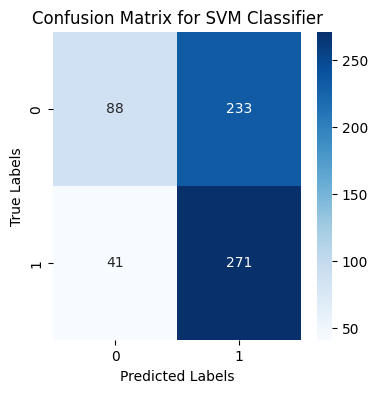

In [ ]:
# results
def wt_acc(cm):
  tp = cm[1][1]
  tn = cm[0][0]
  fp = cm[0][1]
  fn = cm[1][0]
  return (5*tp + tn)/(5*(tp+fn) + (tn+fp))

def c_algo(s):
  return 10*s
def c_expert(s, t):
  return (25 + 397*(s/t) - 1718*((s*s)/(t*t)) + 11296*((s*s*s*s)/(t*t*t*t)))
def c_treat(s):
  return 10000*s
def c_err(s):
  return 50000*s
def cost(cm):
  tp = cm[1][1]
  tn = cm[0][0]
  fp = cm[0][1]
  fn = cm[1][0]
  n = tp + tn + fp + fn
  return (c_algo(n) + c_expert(tp+fp, n) + c_treat(tp) + c_err(fn))/n

print("Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Weighted Accuracy: ", wt_acc(cm))
print("Custom Cost Metric: ", cost(cm)+5000)

labels = svm_model.classes_

# Plotting confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for SVM Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()